In [5]:
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/BoraDemirkol/Bora-Demirkol-DSA-project/main/data/processed/processed_fitness_data.csv"
df = pd.read_csv(url)



In [8]:
df["Calories_per_minute"] = df["Calories"] / df["Duration"]
df = df[df["Duration"] > 0]


In [9]:
groups = df.groupby("BMI_Category")["Calories_per_minute"].apply(list)

stat, p = f_oneway(*groups)

print("F statistic:", stat)
print("p-value:", p)

if p < 0.05:
    print("Result: There is a workout effiency difference between BMI group.")
else:
    print("Result: No difference.")


F statistic: 180.00062709982336
p-value: 8.328351778043381e-41
Result: There is a workout effiency difference between BMI group.


<ipython-input-10-0973852ae06e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="BMI_Category", y="Calories_per_minute", data=df, palette="Set2")


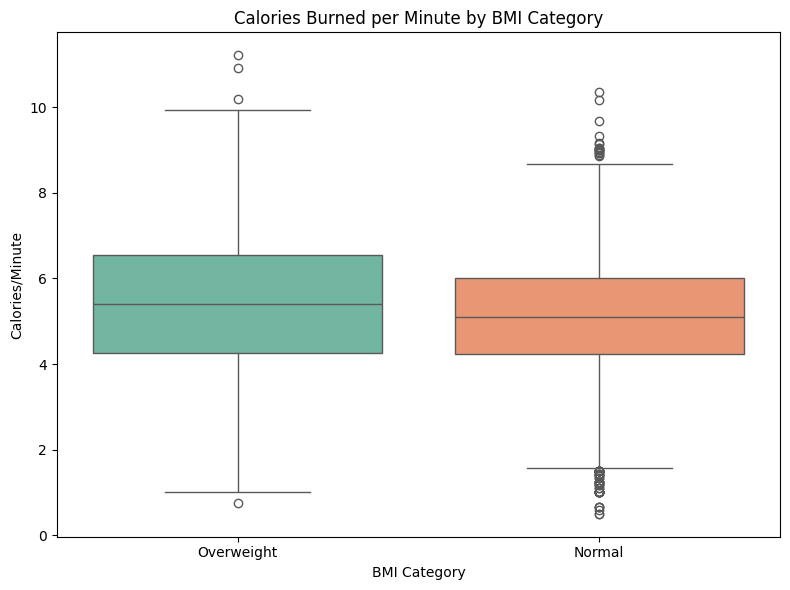

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(x="BMI_Category", y="Calories_per_minute", data=df, palette="Set2")
plt.title("Calories Burned per Minute by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Calories/Minute")
plt.tight_layout()
plt.savefig("bmi_vs_calories_per_minute.png")
plt.show()
